In [ ]:
# In colab run this cell first to setup the file structure!
%cd /content
!rm -rf MOL518-Intro-to-Data-Analysis

!git clone https://github.com/shaevitz/MOL518-Intro-to-Data-Analysis.git
%cd MOL518-Intro-to-Data-Analysis/Lecture_3

# Lecture 3: Plotting Data

In Lecture 2 you made your first plot. In this lecture we will make plots that are easier to read, easier to compare, and useful for talks and papers

The goals of this lecture are to:

- Plot multiple kinds of one dimensional data, including time series, histograms, and categorical summaries.
- Manipulate key components of a scientific figure, including data, axes, labels, and legends.
- Overlay multiple datasets on the same plot
- Choose axis limits and scales
- Export figures in appropriate formats and resolutions for talks and papers.

We will use NumPy for arrays and matplotlib for plotting so will import them at the beginning of our notebook. For commonly used packages like this, it is useful just to import them as a matter of habit when you start out.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

## What makes a plot good or bad?

A plot can be technically correct and still fail to communicate.

Common problems include:
- Missing axis labels or missing units.
- Legends that do not help you map visual elements to meaning.
- Default axis limits that clip features or hide structure.
- Styling choices that make the data hard to see.

[Edward Tufte](https://www.edwardtufte.com/books/) writes a lot about these issues in *The Visual Display of Quantitative Information*. The main point for us is simple. A plot is a visual argument. It should make it easy for a reader to see and understand the data in an unbiased and helpful way.


### Example of a bad plot

<div style="text-align: center;">
  <img src="media/bad_plot.jpg" width="600">
</div>

**Your turn:** Look at the plot above. What makes it hare to read and interpret?

## Line plots in 1D

A time series is a sequence of measurements indexed by time. Here we will use a growth curve, optical density (OD) versus time, which we say in the last class.

We will start with the simplest plot. Then we will refine it by adding labels, choosing a plot type, and adjusting style.

### Load the growth curve data

We will use the file `data/ecoli_drugs.csv`, which has *E. coli* growth curve data in the presence of antibiotics from the Gitai Lab . Open this file up in the file browser (to the left). It should be in the Lecture 3 folder.

You should see that there are 13 columns with the first row as a header to tell you what is in each column. Time is the first column (in minutes, hence the name `Time_min`) and the columns 2-13 show OD in the presence of the different drugs.

Our first task is to read in the file and extract the different data sets into individual arrays. For now we will put the drug names in from the header by hand. We will learn to do this programatically in a few lectures.

In [11]:
# Load the data, skipping the header row
data = np.loadtxt('data/ecoli_drugs.csv', delimiter=',', skiprows=1)

time_min = data[:, 0] #T ime in minutes is the first column

Rifampicin = data[:, 1] # OD for Rifamipicin is the second column
Novabiocin = data[:, 2] # OD for Novabiocin is the third column ...
Trimethoprim = data[:, 3]
Chloramphenicol = data[:, 4]
Ampicillin = data[:, 5]
Gentamycin = data[:, 6]
Gentamycin2 = data[:, 7]
Ampicillin2 = data[:, 8]
Chloramphenicol2 = data[:, 9]
Trimethoprim2 = data[:, 10]
Novabiocin2 = data[:, 11]
Rifampicin2 = data[:, 12]

### We'll start by plotting one of the growth curves

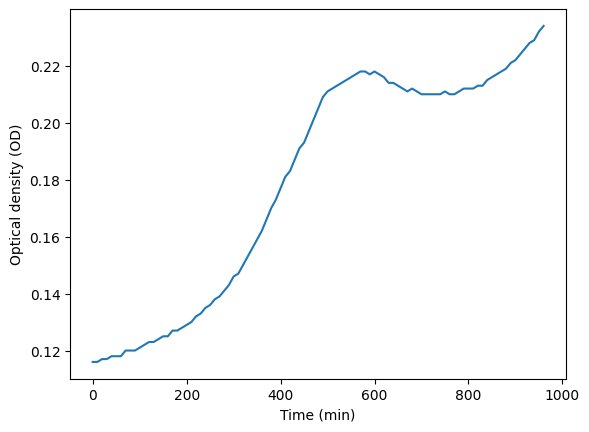

In [ ]:
plt.plot(time_min, Novabiocin)
plt.xlabel('Time (min)')
plt.ylabel('Optical density (OD)')

# Note that in Jupyter notebooks this line is not strictly necessary. 
# In other Python contexts you need it.
plt.show()

### Basic styling

Matplotlib defaults are fine for quick checks, but for slides and papers you often want to control a few parameters.

#### Key parameters

- `linewidth` (or `lw`) controls line thickness. Try values like 1, 2, or 3 for most plots.
- `alpha` controls transparency (opacity). Values range from 0 (invisible) to 1 (fully opaque). Try 0.5 or 0.7 for semi-transparent overlays.
- `color` (or `c`) controls line or marker color.
- `s` controls marker size for scatter plots (we'll do these later). Try values like 20, 50, or 100.
- `marker` controls marker shape (for scatter plots or line plots with markers).

#### Common colors

You can specify colors by name (e.g., `color='red'`) or by shorthand (e.g., `color='r'`):
- Named colors: `'red'`, `'blue'`, `'green'`, `'black'`, `'gray'`, `'orange'`, `'purple'`, `'brown'`
- Shorthand: `'r'` (red), `'b'` (blue), `'g'` (green), `'k'` (black), `'c'` (cyan), `'m'` (magenta), `'y'` (yellow)

#### Common marker shapes

For scatter plots or line plots with markers:
- `'o'` = circle
- `'s'` = square
- `'^'` = triangle
- `'D'` = diamond
- `'*'` = star
- `'+'` = plus
- `'x'` = X mark
- `'.'` = point

#### Fonts and font sizes for axis labels

You can control font properties for axis labels, titles, and other text.

**Font size parameters:**
- `fontsize` (or `size`) controls the size of text in points (pt). Common values:
  - `10` or `12`: Default sizes, good for papers
  - `14` or `16`: Larger, better for presentations
  - `18` or `20`: Large, good for slides where people sit far away

**Font weight:**
- `fontweight` controls boldness: `'normal'`, `'bold'`, `'light'`, or numeric values 100-900
- Example: `fontweight='bold'` makes text stand out

**Font family:**
- `fontfamily` or `family` controls the typeface: `'serif'`, `'sans-serif'`, `'monospace'`
- Most scientific plots use `'sans-serif'` (default is clean and professional)

Let's make our growth curve line thicker and red, the fonts bigger, etc.

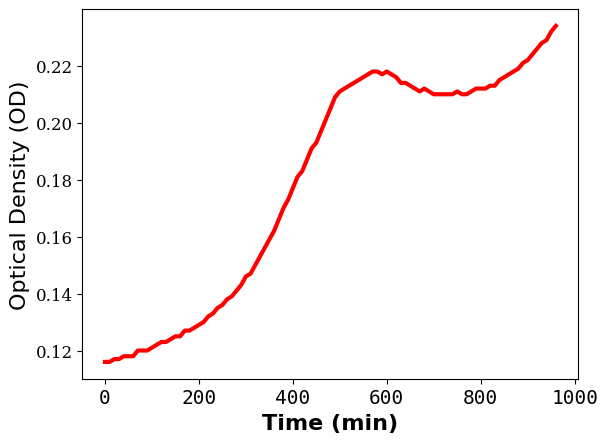

In [ ]:
plt.plot(time_min, Novabiocin, linewidth=3, color='red')
plt.xlabel('Time (min)', fontsize=16, fontweight='bold')
plt.ylabel('Optical Density (OD)', fontsize=16, fontweight='light')
plt.xticks(fontsize=14, fontfamily='monospace')  # Size and font of the numbers on x-axis
plt.yticks(fontsize=12, fontfamily='serif')  # Size and font of the numbers on y-axis
plt.show()

### Figure size

You can control the size and shape of your figure by first using `plt.figure(figsize=(width, height))`, where width and height are in inches.

Here is an example of the growth curve in a wide, 3:1 aspect ratio.

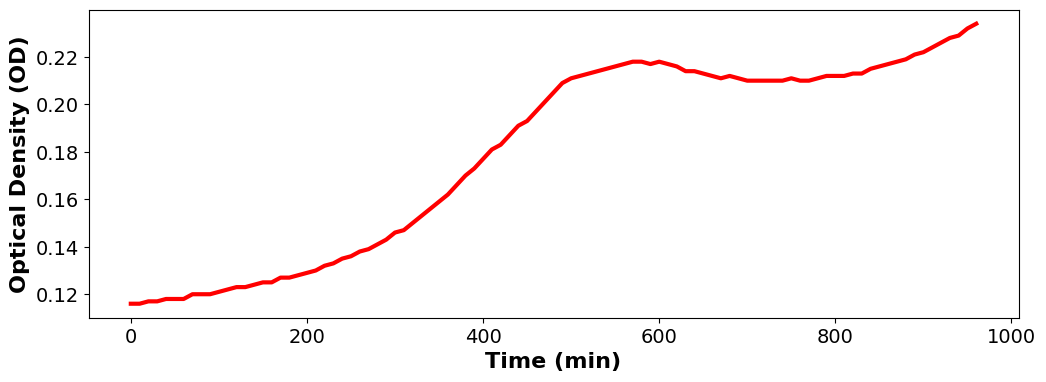

In [ ]:
plt.figure(figsize=(12, 4))  # 3:1 aspect ratio (width:height)
plt.plot(time_min, Novabiocin, linewidth=3, color='red')
plt.xlabel('Time (min)', fontsize=16, fontweight='bold')
plt.ylabel('Optical Density (OD)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Exercise 1

Plot the `Gentamycin` dataset. Make two figures, one which would look good in a paper and on which would look good in a talk. Why did you choose the various parameters?


In [17]:
# Your code here



### Plotting multiple datasets on the same axes

We often want to plot multiple datasets on the same axis to compare the results. We will need to make sure they are visually distinct, e.g. with different coloes, and that there is a legend. Python will default to choosing different colors, but you could always specify them explicitely.

In a paper, you might not use a legend and instead define the colors in the figure caption.

Let's make a single figure that plots the growth curves from the different drugs on the same plot. We will add a `label` to each plot which tells Python what to put in the legend.

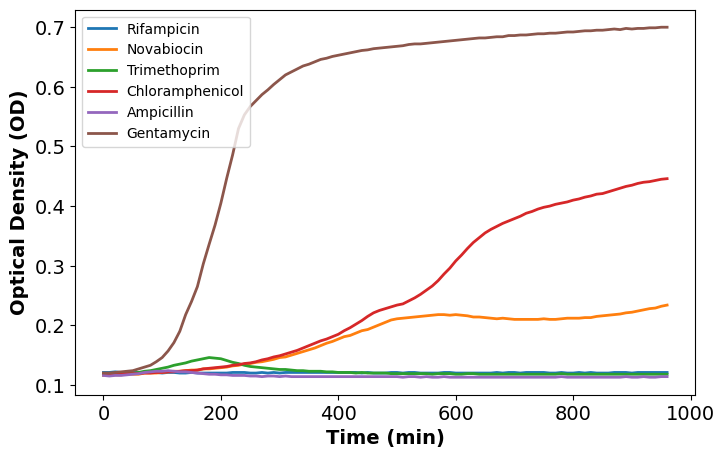

In [51]:
plt.figure(figsize=(8, 5))
plt.plot(time_min, Rifampicin, lw=2, label='Rifampicin')
plt.plot(time_min, Novabiocin, lw=2, label='Novabiocin')
plt.plot(time_min, Trimethoprim, lw=2, label='Trimethoprim')
plt.plot(time_min, Chloramphenicol, lw=2, label='Chloramphenicol')
plt.plot(time_min, Ampicillin, lw=2, label='Ampicillin')
plt.plot(time_min, Gentamycin, lw=2, label='Gentamycin')

plt.xlabel('Time (min)', fontsize=14, fontweight='bold')
plt.ylabel('Optical Density (OD)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10, loc='upper left')
plt.show()

### Exercise 2

Make a plot of the two Chloramphenicol replicates. Do they look similar?

In [ ]:
# Your code here





## Scatter plots

A time series, like the OD growth curves, have a continous time variable so the lend themselves to the kinds of line plots we've been using. If you want to plot the relationship between one sampled variable and another, you might want to use a scatter plot.

Let's load a new data set which contains from [measurements from multiple woodlice](https://onlinelibrary.wiley.com/doi/full/10.1002/ece3.6683) of each animal's mass (in mg) and the average size of two different types of cells (in $\mu m^2$).

In [32]:
# Load woodlice data, skipping the first column (text labels)
# We will skip the first column for now, can you tell why?
woodlice_data = np.loadtxt('data/woodlice_cell_size.csv', delimiter=',', skiprows=1, usecols=(1, 2, 3))

mass = woodlice_data[:, 0]  # Mass in mg
bcell_area = woodlice_data[:, 1]  # First cell type area in μm²
gutcell_area = woodlice_data[:, 2]  # Second cell type area in μm²

Let's look at how the mass and b cell area relate to each other.

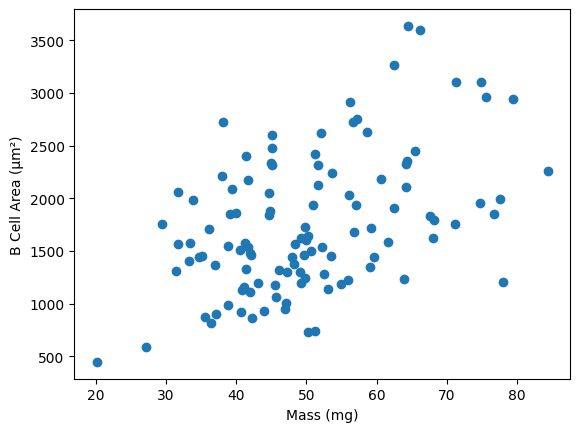

In [ ]:
# Make a scatter plot of bcell_area vs mass
plt.scatter(mass, bcell_area)
plt.xlabel('Mass (mg)')
plt.ylabel('B Cell Area (μm²)')
plt.show()

We can set the marker type, size, and color like this. Note that you can use the transparency `alpha` parameter to allow you to see the overlap between points.

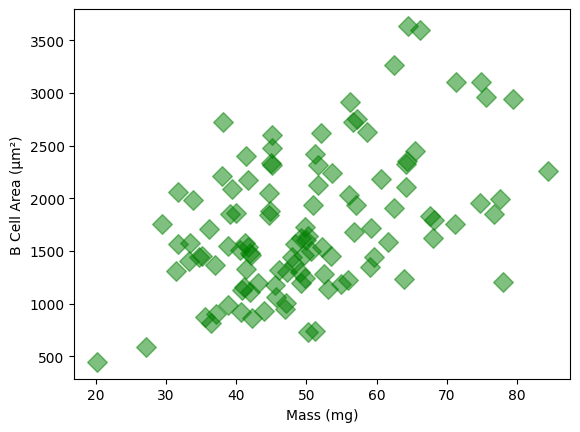

In [52]:
plt.scatter(mass, bcell_area, marker='D', s=100, color='green', alpha=0.5)
plt.xlabel('Mass (mg)')
plt.ylabel('B Cell Area (μm²)')
plt.show()

You can also plot multiple scatter plots on the same axes.

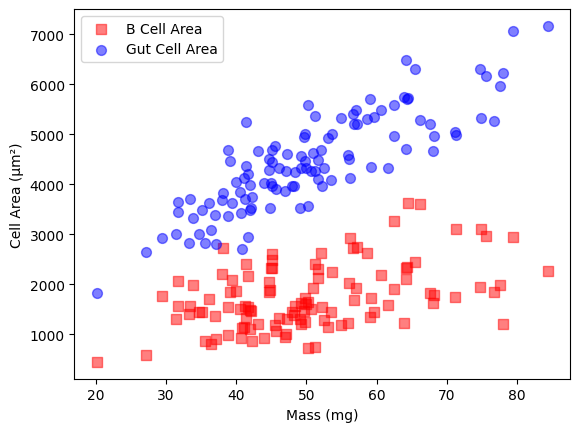

In [56]:
plt.scatter(mass, bcell_area, marker='s', s=50, color='red', alpha=0.5, label='B Cell Area')
plt.scatter(mass, gutcell_area, marker='o', s=50, color='blue', alpha=0.5, label='Gut Cell Area')
plt.xlabel('Mass (mg)')
plt.ylabel('Cell Area (μm²)')
plt.legend()
plt.show()

### Figures and axes

When you call `plt.plot(...)` you are using a global plotting state.

A more explicit approach is:
- Create a figure and an axes object.
- Plot on that axes object.

The axes object is usually called `ax`. You can think of it as the rectangular plotting area where data is drawn.


In [ ]:
fig, ax = plt.subplots()
ax.plot(time, od, linewidth=2)
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Optical density (OD)')
plt.tight_layout()
plt.show()


### Load a second time series

This is a placeholder file name. You will add the file into `data/`.

We will assume it has the same time column as the OD file, and a second column for pH.


In [ ]:
ph_data = np.loadtxt('data/ph_timecourse.csv', delimiter=',')
ph_time = ph_data[:, 0]
ph = ph_data[:, 1]

ph_time[:5], ph[:5]


### Create a second y axis using `twinx`

`ax.twinx()` creates a new axes that shares the same x axis but has its own y axis.

We will also color the axis labels and tick labels to match the corresponding line. This makes the plot easier to read.


In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(time, od, linewidth=2, color='blue')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Optical density (OD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(ph_time, ph, linewidth=2, color='red')
ax2.set_ylabel('pH', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()


### Exercise 3

Make a two axis plot of OD and pH versus time.

Decide whether OD should be linear or log scale. Explain your choice in one sentence in a markdown cell.


In [ ]:
# Your code here


## 5. Subplots and panels

## 6. Histograms: visualizing a distribution

A histogram is a way to summarize a distribution of values, for example fluorescence intensity across many cells in a single condition.

In this course you will not compute bins manually. Instead, you choose a bin setting using the `bins` argument, and matplotlib handles the counting.


### Load single cell fluorescence intensity measurements

This file should contain a single column of numbers, one per cell.

The units are often arbitrary units (a.u.) after background subtraction and normalization.


In [ ]:
fluor = np.loadtxt('data/fluorescence_single_condition.csv', delimiter=',')
fluor[:10]


### Plot a histogram

Here we choose `bins=30`. That is a reasonable starting point for many datasets.

If the histogram looks too noisy, you can use fewer bins.
If it looks too coarse, you can use more bins.


In [ ]:
plt.hist(fluor, bins=30)
plt.xlabel('Fluorescence intensity (a.u.)')
plt.ylabel('Number of cells')
plt.tight_layout()
plt.show()


### Exercise 4

Make two histograms of the same fluorescence dataset.

- One with fewer bins (for example 10).
- One with more bins (for example 60).

Which one helps you see the distribution more clearly?


In [ ]:
# Your code here


## 7. Violin plots: comparing distributions across categories

A violin plot is useful when you want to compare several distributions side by side, for example three experimental conditions.

A violin plot shows a smoothed distribution shape. It is most informative when you have many points per category.

In this notebook we will keep the dataset generic. You can swap in a real dataset later without changing the plotting code structure.


### Placeholder data for multiple conditions

Use placeholder filenames for now. Each file should contain one column of values for one condition.


In [ ]:
data_A = np.loadtxt('data/condition_A.csv', delimiter=',')
data_B = np.loadtxt('data/condition_B.csv', delimiter=',')
data_C = np.loadtxt('data/condition_C.csv', delimiter=',')

len(data_A), len(data_B), len(data_C)


### Violin plot

Matplotlib does not automatically label categories on the x axis for violin plots, so we will set the tick labels ourselves.


In [ ]:
plt.violinplot([data_A, data_B, data_C], showmeans=True)
plt.xticks([1, 2, 3], ['A', 'B', 'C'])
plt.xlabel('Condition')
plt.ylabel('Measured quantity')
plt.tight_layout()
plt.show()


### Exercise 5

Replace the labels A, B, and C with more descriptive condition names once you choose a dataset.

For now, practice changing axis labels and tick labels so the plot reads clearly without a title.


In [ ]:
# Your code here


## 8. Axis choices and scale choices

Two common decisions strongly affect interpretation.

1. Linear versus log scale.
2. Axis limits.

For growth curves, a log y axis can reveal exponential growth phases that are not obvious on a linear scale.


### Linear scale versus log scale

We will plot the same OD data two ways.


In [ ]:
plt.plot(time, od, linewidth=2)
plt.xlabel('Time (hours)')
plt.ylabel('Optical density (OD)')
plt.tight_layout()
plt.show()


In [ ]:
plt.semilogy(time, od, linewidth=2)
plt.xlabel('Time (hours)')
plt.ylabel('Optical density (OD)')
plt.tight_layout()
plt.show()


### Axis limits

Sometimes you want to zoom in to show a specific feature.
Sometimes you want to zoom out to show context.

You can set limits using `plt.xlim` and `plt.ylim` for the pyplot style, or `ax.set_xlim` and `ax.set_ylim` for the axes object style.


In [ ]:
plt.plot(time, od, linewidth=2)
plt.xlabel('Time (hours)')
plt.ylabel('Optical density (OD)')

plt.xlim(0, 10)
plt.ylim(0, 0.6)

plt.tight_layout()
plt.show()


### Exercise 6

Choose axis limits that make the growth phase you care about easiest to see.

Try at least two different choices of limits.


In [ ]:
# Your code here


## 9. Figure layout basics

A plot that looks fine in a notebook can be unreadable on a slide.

Two practical steps help a lot.
- Choose a figure size appropriate for the output.
- Increase label font sizes for presentations.

We will make these choices explicitly rather than relying on defaults.


In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(time, od, linewidth=2)
plt.xlabel('Time (hours)', fontsize=14)
plt.ylabel('Optical density (OD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## 10. Categorical data with error bars

A bar plot summarizes categories, for example mean lifespan under different treatments.

This kind of plot hides the underlying distribution, so you should use it when summarization is what you want.

We will treat the means and error bars as given values.


In [ ]:
labels = ['Control', 'Treatment A', 'Treatment B']
means = np.array([12.3, 15.1, 9.8])
errors = np.array([1.2, 1.0, 1.5])

plt.figure(figsize=(6, 4))
plt.bar(labels, means, yerr=errors)
plt.ylabel('Lifespan (days)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Exercise 7

Change the y axis limits so the error bars are not cramped.
Then change the figure size to make the category labels easier to read.


In [ ]:
# Your code here


## 11. Exporting figures

You will often need the same plot in two formats.

- PNG for slides. This is a raster format. It depends on resolution.
- PDF for papers. This is a vector format. It scales cleanly.

A practical habit is to save figures into your project folder with consistent filenames.


### Save a plot as PNG and PDF

We will save the same growth curve plot in both formats.

We will also print the file sizes. This is a quick way to notice when you accidentally saved a low resolution image.


In [ ]:
import os

plt.figure(figsize=(6, 4))
plt.plot(time, od, linewidth=2)
plt.xlabel('Time (hours)')
plt.ylabel('Optical density (OD)')
plt.tight_layout()

plt.savefig('growth_curve_slide.png', dpi=200)
plt.savefig('growth_curve_paper.pdf')

plt.show()

print('PNG size (bytes):', os.path.getsize('growth_curve_slide.png'))
print('PDF size (bytes):', os.path.getsize('growth_curve_paper.pdf'))


### Exercise 8

Export the same plot twice.

- One PNG that would be suitable for slides.
- One PDF that would be suitable for a manuscript.

Change the DPI of the PNG and see how the file size changes.


In [ ]:
# Your code here


## Common failure modes

- Forgetting imports.
- Plotting arrays of different lengths without noticing.
- Overlaying mismatched datasets, for example time arrays that do not align.
- Legends that cover the data.
- Exporting a low resolution image and only discovering it later.
